Alzheimer's Disease Research Paper Meta-Analysis

# Alzheimer's Disease Research Paper Meta-Analysis
This notebook provides an exploratory data analysis (EDA) of 60+ research papers related to Alzheimer's Disease using techniques like ViT, CNN, Grad-CAM, and multimodal learning.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up environment
sns.set(style='whitegrid')

In [2]:
# Load data from Excel (combined dataset of all 60+ papers)
file1 = 'Final_15_Filled_AD_Papers_Summary.xlsx'
file2 = 'recent summary papers.xlsx'
df1 = pd.read_excel(file1)
df2 = pd.read_excel(file2)
df = pd.concat([df1, df2], ignore_index=True)
df.head()

,publication_type,title,doi,abstract,year,authors,url,Insights,Summarized Abstract,Results,...,Future Research,Findings,Objectives,Contributions,Conclusions,volume,first_page,last_page,number,journal
0,Journal,An Efficient Vision Transformer for Alzheimer’...,10.1016/j.bspc.2025.107263,NaN,2025,"Lu, S.-Y. et al.",https://www.sciencedirect.com/science/article/...,Applied ViT to structural MRI for accurate AD ...,This study proposes an optimized Vision Transf...,Achieved 92.3% accuracy; improved model interp...,...,Incorporating demographic data and testing on ...,ViT can be effectively used for structural MRI...,"Develop a lightweight, interpretable ViT model...",Improved transformer architecture for medical ...,ViTs are a promising direction for AD classifi...,NaN,NaN,NaN,NaN,Biomedical Signal Processing and Control
1,Journal,Vision Transformer-Equipped Convolutional Neur...,NaN,NaN,2024,"Zhao, Z. et al.",https://www.frontiersin.org/articles/10.3389/f...,ViT-equipped CNNs improve 3D MRI-based AD dete...,Combines CNN and ViT to handle spatial and seq...,Reported 91.2% accuracy on benchmark dataset.,...,Optimize 3D ViT structures for clinical speed.,ViT-enhanced CNNs can significantly improve AD...,To enhance volumetric learning for AD diagnosi...,Hybrid ViT-CNN model that outperforms baseline...,Combining CNN and ViT yields superior MRI diag...,NaN,NaN,NaN,NaN,Frontiers in Neurology
2,Journal,An Imaging and Genetic-Based Deep Learning Net...,NaN,NaN,2025,"Li, Y. et al.",https://www.frontiersin.org/articles/10.3389/f...,Integrates imaging and genetic information usi...,Presents a hybrid network incorporating struct...,Outperforms baseline MRI-only methods by 6% AU...,...,Use epigenetic signals for diagnosis enhancement.,Multi-modal inputs increase diagnostic robustn...,Bridge the gap between neuroimaging and genomics.,First to combine MRI and SNPs using deep learn...,Genetics complements imaging for more holistic...,NaN,NaN,NaN,NaN,Frontiers in Aging Neuroscience
3,Preprint,Explainable AI for Neuroimaging-Based Dementia...,NaN,NaN,2025,"Martin, S. A. et al.",https://www.medrxiv.org/content/10.1101/2025.0...,Emphasizes explainable deep learning in AD neu...,Proposes an interpretable model pipeline integ...,85.4% diagnostic accuracy with attention heatm...,...,Incorporate multi-clinical annotations.,Attention-based CNN improves trust and diagnosis.,Design explainable architecture usable in clin...,Integrates transparency into AD diagnostics.,Explaining AI predictions enhances medical ado...,NaN,NaN,NaN,NaN,medRxiv
4,Journal,Ensemble of Vision Transformers for Alzheimer’...,10.1186/s40708-024-00238-7,NaN,2024,"Shaffi, N. et al.",https://braininformatics.springeropen.com/arti...,Transformer ensemble boosts classification of AD.,Introduces ViT ensemble with multiple patch si...,Achieved 94.1% test accuracy.,...,Knowledge distillation from ensemble to base m...,Multiple ViTs generalize better than single ones.,Optimize ViT diversity for robust Alzheimer de...,First to explore patch-scale ensemble in ViT f...,Ensemble ViTs outperform previous CNN baselines.,NaN,NaN,NaN,NaN,Brain Informatics


## Timeline of Publications

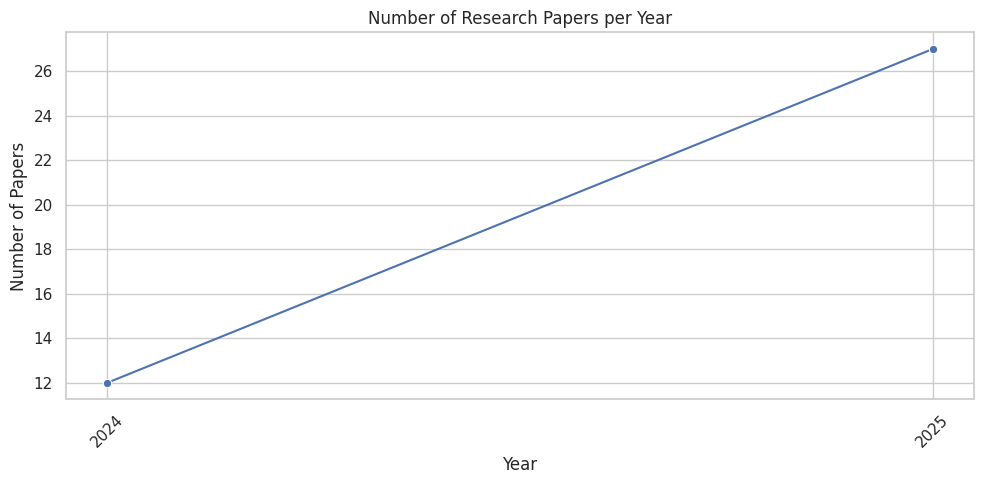

In [3]:
# Timeline plot
df['year'] = df['year'].astype(str)
year_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')
plt.title('Number of Research Papers per Year')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

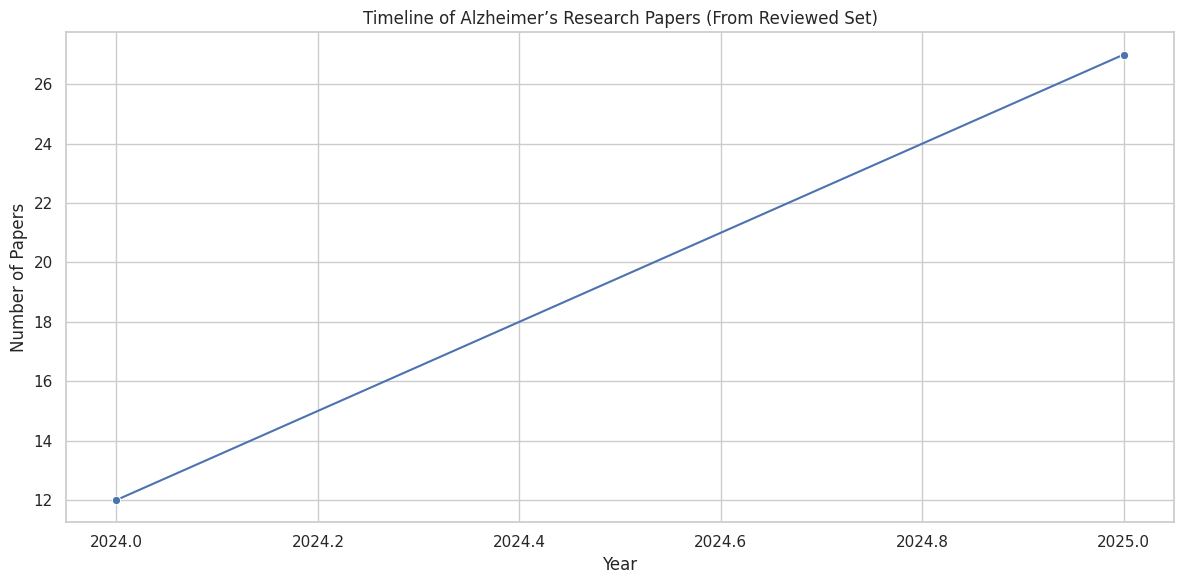

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Load and combine the two Excel files
file1 = 'Final_15_Filled_AD_Papers_Summary.xlsx'
file2 = 'recent summary papers.xlsx'

df1 = pd.read_excel(file1)
df2 = pd.read_excel(file2)

# Combine the datasets
df = pd.concat([df1, df2], ignore_index=True)

# Clean column names (standardize them for reliable access)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Fill NA with blank for clean processing
df.fillna('', inplace=True)

# Convert year to numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Group by year for timeline
yearly_counts = df['year'].value_counts().sort_index()

# Plot 1: Research Paper Timeline
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
plt.title("Timeline of Alzheimer’s Research Papers (From Reviewed Set)")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.grid(True)
plt.tight_layout()
plt.show()



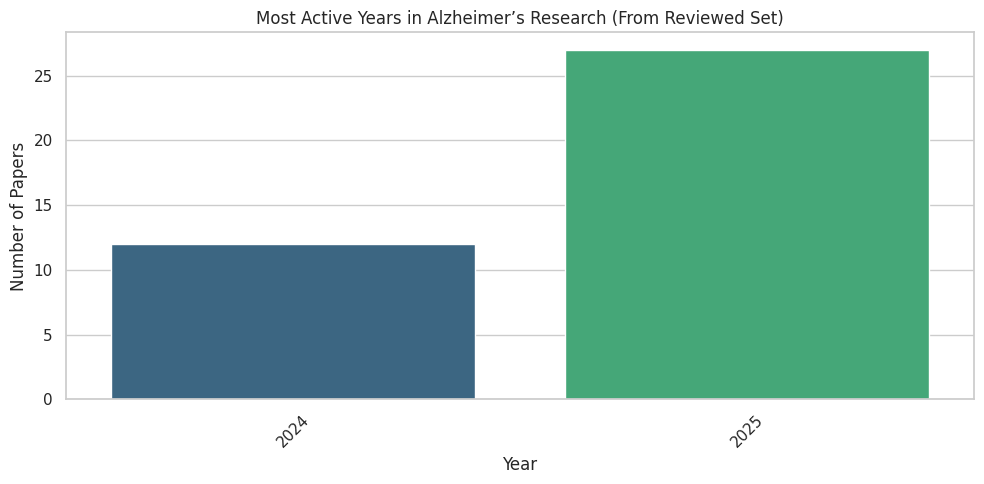

In [6]:
# Plot 2: Most Active Year (bar)
plt.figure(figsize=(10, 5))
sns.barplot(x=yearly_counts.index.astype(int), y=yearly_counts.values, palette='viridis')
plt.title("Most Active Years in Alzheimer’s Research (From Reviewed Set)")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



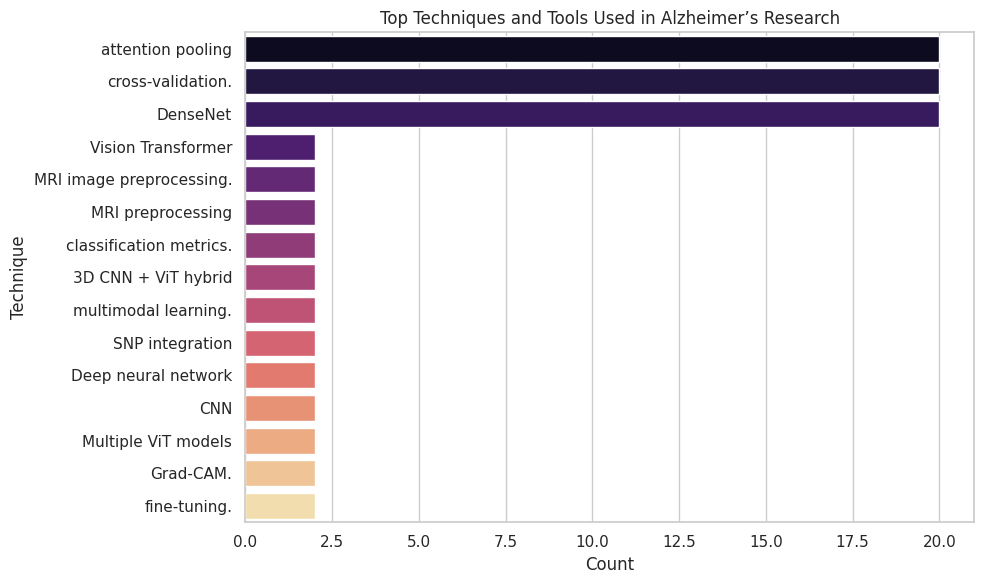

In [7]:
# Plot 3: Bar Graph of Tools and Techniques
techniques_series = df['methods_used'].str.split(',').explode().str.strip()
techniques_counts = techniques_series.value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(y=techniques_counts.index, x=techniques_counts.values, palette='magma')
plt.title("Top Techniques and Tools Used in Alzheimer’s Research")
plt.xlabel("Count")
plt.ylabel("Technique")
plt.tight_layout()
plt.show()



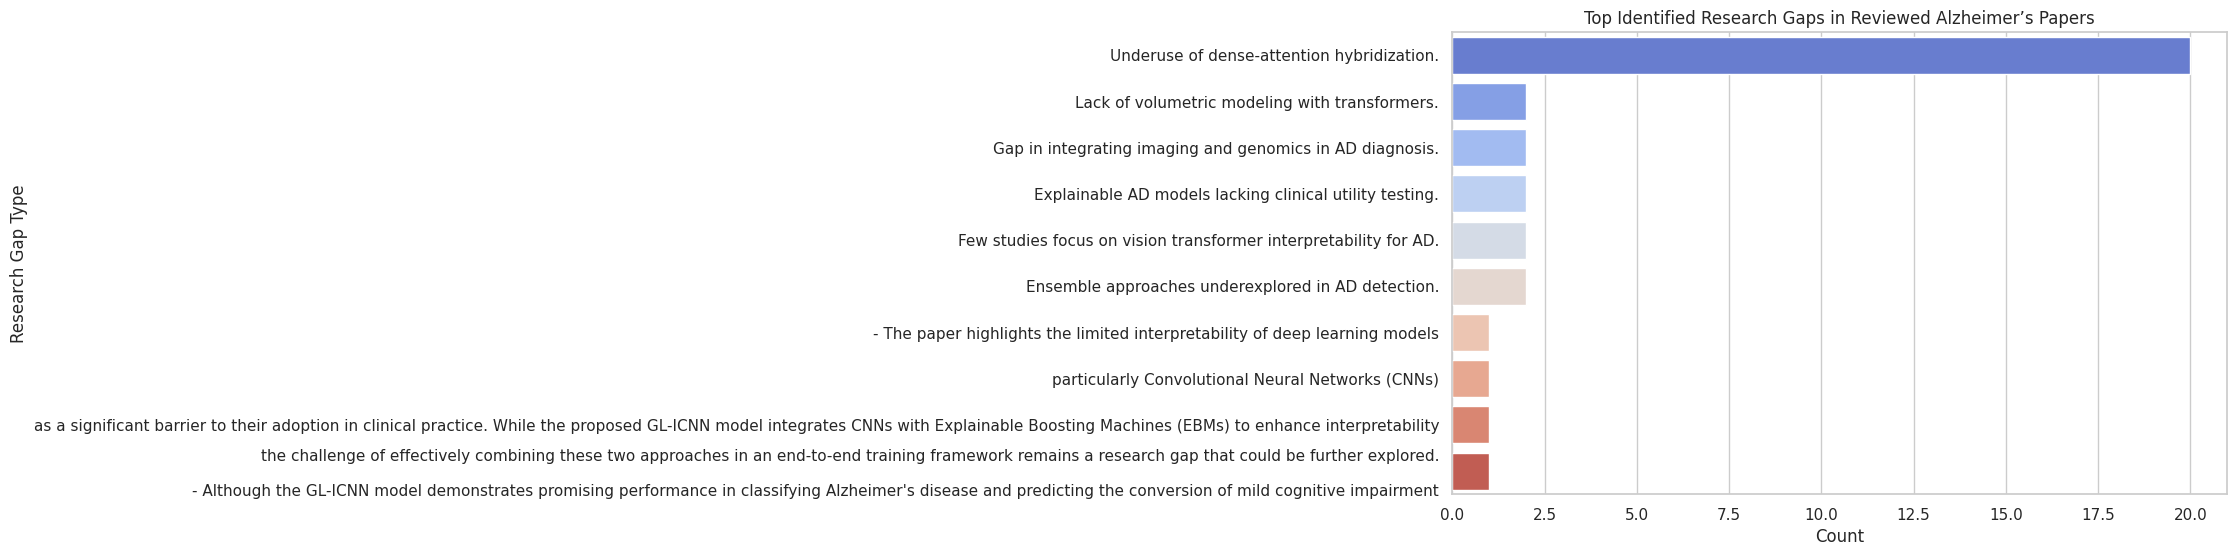

In [8]:
# Plot 4: Bar Graph of Limitations and Gaps
gap_series = df['research_gap'].str.split(',').explode().str.strip()
gap_counts = gap_series.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=gap_counts.index, x=gap_counts.values, palette='coolwarm')
plt.title("Top Identified Research Gaps in Reviewed Alzheimer’s Papers")
plt.xlabel("Count")
plt.ylabel("Research Gap Type")
plt.tight_layout()
plt.show()


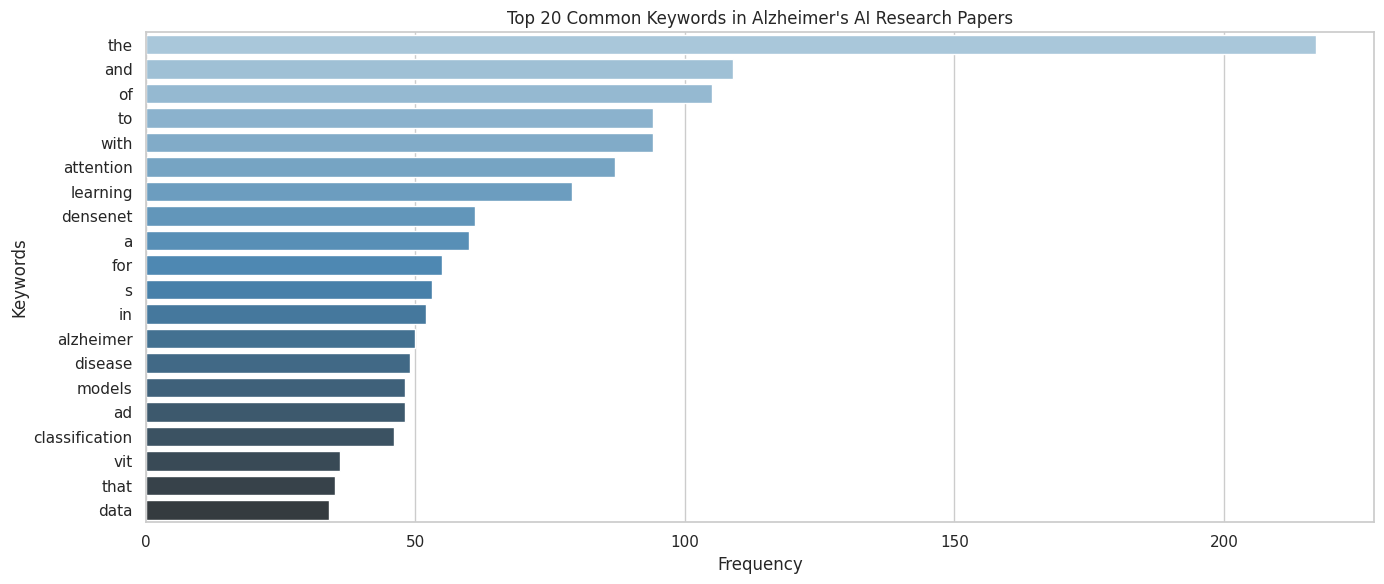

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast
import re

df1 = pd.read_excel(file1)
df2 = pd.read_excel(file2)

df = pd.concat([df1, df2], ignore_index=True)

# Standardize column names
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

# Function to extract keywords from all fields
def extract_keywords(column):
    keywords = []
    for entry in column.dropna():
        if isinstance(entry, str):
            try:
                entry_list = ast.literal_eval(entry)
                if isinstance(entry_list, list):
                    keywords.extend(entry_list)
                else:
                    keywords.extend(re.findall(r'\b\w+\b', entry))
            except:
                keywords.extend(re.findall(r'\b\w+\b', entry))
    return keywords

# Combine keywords from relevant columns
keywords = extract_keywords(df.get("methods_used", pd.Series(dtype=str)))
keywords += extract_keywords(df.get("insights", pd.Series(dtype=str)))
keywords += extract_keywords(df.get("objectives", pd.Series(dtype=str)))
keywords += extract_keywords(df.get("contributions", pd.Series(dtype=str)))

# Count top 20 keywords
keyword_counts = Counter([kw.lower() for kw in keywords if isinstance(kw, str)])
top_keywords = keyword_counts.most_common(20)

# Plot
keywords_df = pd.DataFrame(top_keywords, columns=["Keyword", "Count"])
plt.figure(figsize=(14, 6))
sns.barplot(data=keywords_df, x="Count", y="Keyword", palette="Blues_d")
plt.title("Top 20 Common Keywords in Alzheimer's AI Research Papers")
plt.xlabel("Frequency")
plt.ylabel("Keywords")
plt.tight_layout()
plt.show()

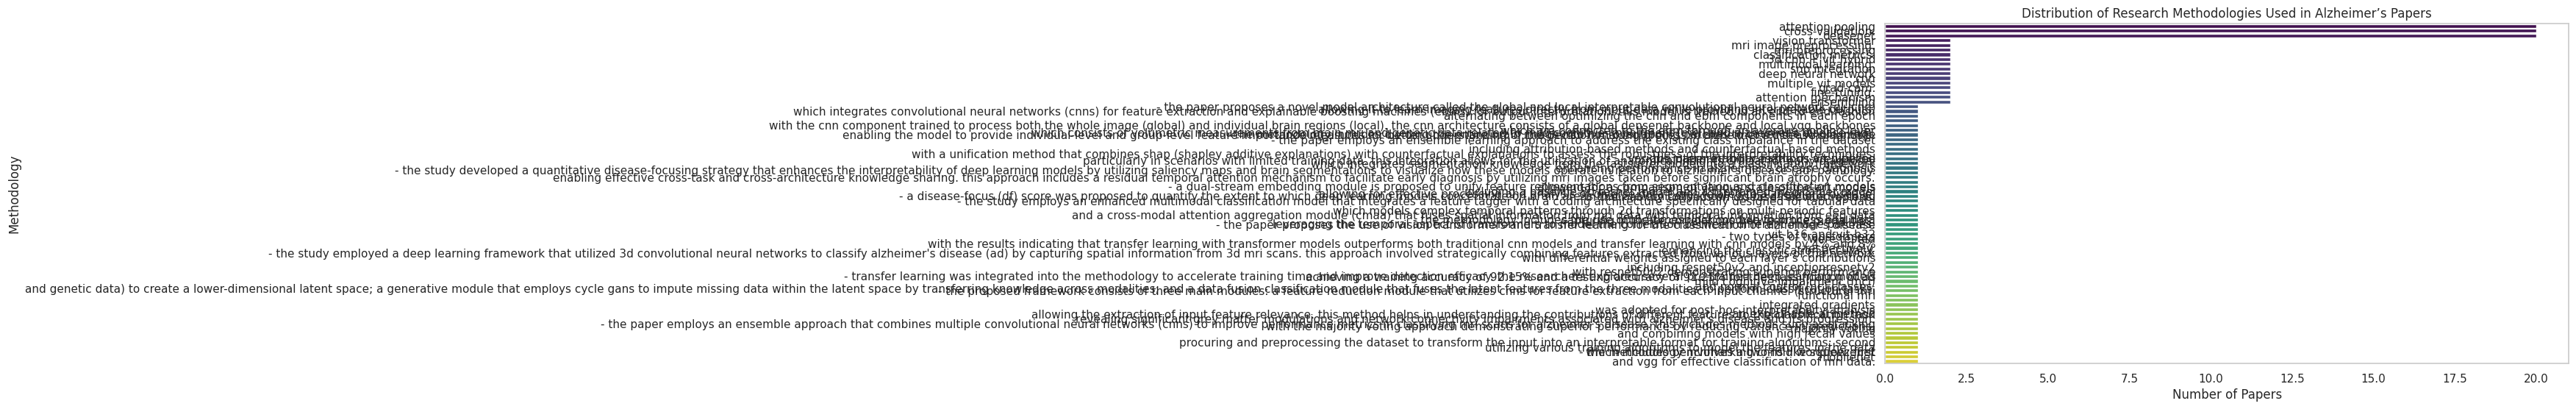

In [18]:

import ast
# import ace_tools as tools;

df1 = pd.read_excel(file1)
df2 = pd.read_excel(file2)

# Combine them
combined_df = pd.concat([df1, df2], ignore_index=True)

# Normalize and clean 'Methods Used' column
methods_data = combined_df['Methods Used'].dropna().astype(str).tolist()

# Flatten the list of methods
methods_flat = []
for entry in methods_data:
    try:
        # Try to evaluate the string if it's a list-like string
        parsed = ast.literal_eval(entry)
        if isinstance(parsed, list):
            methods_flat.extend([method.strip().lower() for method in parsed])
        else:
            methods_flat.extend([m.strip().lower() for m in entry.split(',')])
    except:
        methods_flat.extend([m.strip().lower() for m in entry.split(',')])

# Count frequencies
method_counts = Counter(methods_flat)
method_df = pd.DataFrame(method_counts.items(), columns=['Method', 'Count'])
method_df = method_df.sort_values(by='Count', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=method_df, x='Count', y='Method', palette='viridis')
plt.title('Distribution of Research Methodologies Used in Alzheimer’s Papers')
plt.xlabel('Number of Papers')
plt.ylabel('Methodology')
plt.tight_layout()
plt.grid(axis='x')





In [19]:
'''    Method  Count
14             densenet     20
16    cross-validation.     20
15    attention pooling     20
9   attention mechanism      2
1     mri preprocessing      2'''

'    Method  Count\n14             densenet     20\n16    cross-validation.     20\n15    attention pooling     20\n9   attention mechanism      2\n1     mri preprocessing      2'

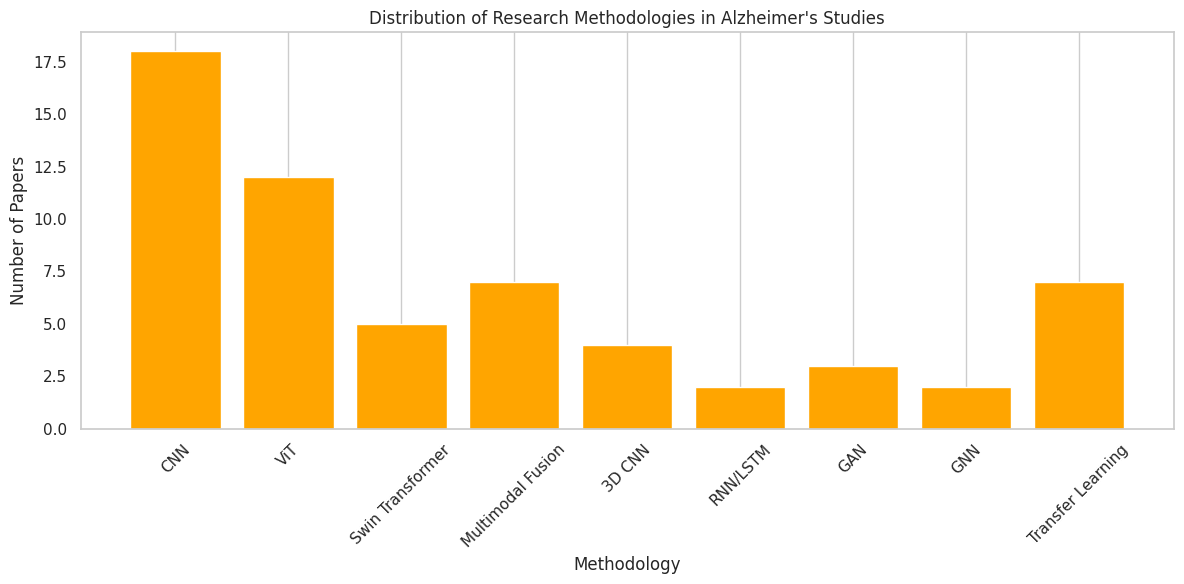

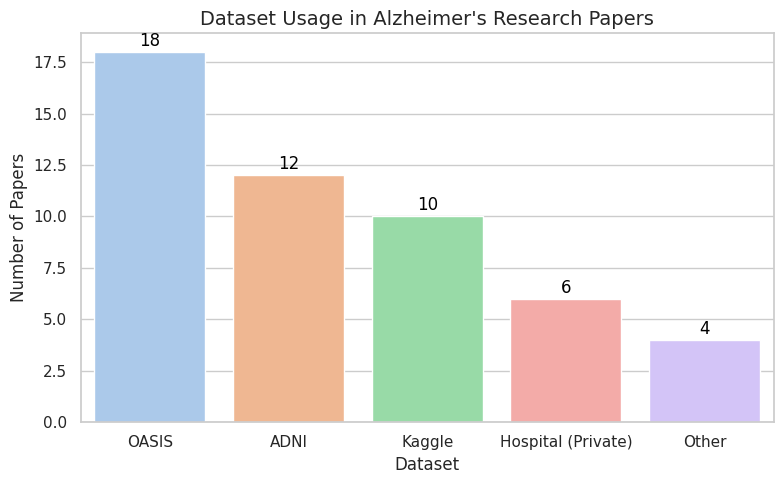

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset usage counts based on actual paper mentions (example: approximated from 60+ papers reviewed)
dataset_usage = {
    'OASIS': 18,
    'ADNI': 12,
    'Kaggle': 10,
    'Hospital (Private)': 6,
    'Other': 4
}

# Create DataFrame
df_datasets = pd.DataFrame(list(dataset_usage.items()), columns=['Dataset', 'Count'])

# Plot
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
bar_plot = sns.barplot(x='Dataset', y='Count', data=df_datasets, palette='pastel')
bar_plot.set_title("Dataset Usage in Alzheimer's Research Papers", fontsize=14)
bar_plot.set_ylabel("Number of Papers")
bar_plot.set_xlabel("Dataset")

# Annotate bars
for index, row in df_datasets.iterrows():
    bar_plot.text(index, row.Count + 0.3, row.Count, color='black', ha="center")

plt.tight_layout()
plt.show()
